In [1]:
!pip install micromlgen

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for micromlgen: filename=micromlgen-1.1.28-py3-none-any.whl size=32172 sha256=e5dd684de60b4d485ac63698ff2666b5c9d42c98626fc09950aeff2d085dd28f
  Stored in directory: /root/.cache/pip/wheels/6f/98/43/0860b692737af546b9262a8b60ec3690c8bdc51c25e545ae09
Successfully built micromlgen


In [3]:
import numpy as np
from os.path import basename
from glob import glob
from sklearn.svm import SVC, LinearSVC
from xgboost.sklearn import XGBClassifier
from micromlgen import port
from sklearn.model_selection import train_test_split

def load_features(folder):
    dataset = None
    classmap = {}
    for class_idx, filename in enumerate(glob('%s/*.csv' % folder)):
        class_name = basename(filename)[:-4]
        print(class_name)
        classmap[class_idx] = class_name
        samples = np.loadtxt(filename, dtype=float, delimiter=',')
        labels = np.ones((len(samples), 1)) * class_idx
        samples = np.hstack((samples, labels))
        dataset = samples if dataset is None else np.vstack((dataset, samples))
    return dataset, classmap

np.random.seed(0)
dataset, classmap = load_features('data')
X, y = dataset[:, :-1], dataset[:, -1]

p
a
e


In [4]:
len(X)

150

In [5]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [13]:
# this line is for testing your accuracy only: once you're satisfied with the results, set test_size to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

clf = SVC(kernel='poly', degree=2, gamma=0.1, C=100)
# clf = LinearSVC(C=100)
# clf = XGBClassifier(objective='multi:softprob', num_class=3)
clf.fit(X_train, y_train)

print('Accuracy', clf.score(X_test, y_test))

Accuracy 0.7333333333333333


In [14]:
print('Exported classifier to plain C')
print(port(clf, classmap=classmap))

Exported classifier to plain C
#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class SVM {
                public:
                    /**
                    * Predict class for features vector
                    */
                    int predict(float *x) {
                        float kernels[105] = { 0 };
                        float decisions[3] = { 0 };
                        int votes[3] = { 0 };
                        kernels[0] = compute_kernel(x,   2628.33  , 1046.39  , 1475.23  , 1593.01  , 637.75  , 688.73  , 726.81  , 548.65  , 755.03  , 747.23  , 889.47  , 1227.52  , 2297.43  , 1070.35  , 779.96  , 1298.8  , 1157.66  , 1090.09  , 963.15  , 2009.3  , 2174.49  , 1237.67  , 1009.91  , 1208.82  , 5792.62  , 5792.62  , 5792.62  , 5792.62  , 5792.62  , 5792.62  , 5792.62  , 5792.62  , 5792.62  , 5792.62  , 5792.62  , 5792.62  , 5792.62  , 5792.62  , 5792.62  , 5792.62  , 5792.62  , 5792.62  , 5792.62  , 5792.62 

# Method 2

In [15]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # only print out fatal log

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

import tensorflow as tf
from tensorflow.keras import layers, Sequential


# force computer to use CPU if there are no GPUs present

# tf.test.is_gpu_available()


# set random seed

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)
# tf.config.list_physical_devices('GPU')


In [16]:
data = X
target = y
print(len(data))
print(y)

150
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]


In [20]:
# create training data (60%), validation data (20%) and testing data (20%)
ITERATION = 2000
BATCH_SIZE = 4

data_train, data_test, target_train, target_test = train_test_split(
    data, target, test_size=0.2, random_state=RANDOM_SEED)
data_train, data_validate, target_train, target_validate = train_test_split(
    data_train, target_train, test_size=0.25, random_state=RANDOM_SEED)


# create a TF model

# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((data.shape[1], 1), name='input'),
#     tf.keras.layers.LSTM(4, time_major=False, return_sequences=True),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(np.unique(target).size, activation=tf.nn.softmax, name='output')
# ])
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])
# model.summary()

model = Sequential()
model.add(layers.Dense(data.shape[1], activation='relu', input_shape=(data.shape[1],)))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(np.unique(target).size * 4, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(np.unique(target).size, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


# training TF model

history = model.fit(data_train, target_train, epochs=ITERATION, batch_size=BATCH_SIZE,
                    validation_data=(data_validate, target_validate))
predictions = model.predict(data_test)
test_score = model.evaluate(data_test, target_test)


# get the predicted label based on probability

predictions_categorical = np.argmax(predictions, axis=1)


# display prediction performance on validation data and test data

print('Prediction Accuracy:', accuracy_score(target_test, predictions_categorical).round(3))
print('Test accuracy:', round(test_score[1], 3))
print('Test loss:', round(test_score[0], 3))
print('')
print(classification_report(target_test, predictions_categorical))


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 12)                1548      
                                                                 
 dropout_6 (Dropout)         (None, 12)                0         
                                                                 
 dense_10 (Dense)            (None, 3)                 39        
                                                                 
Total params: 18,099
Trainable params: 18,099
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
23/23 [==============================

KeyboardInterrupt: ignored

In [ ]:
# convert TF model to TF Lite model as a C header file (for the classifier)
!pip install tinymlgen
from tinymlgen import port
with open('tf_lite_model.h', 'w') as f:
    f.write(port(model, optimize=False))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


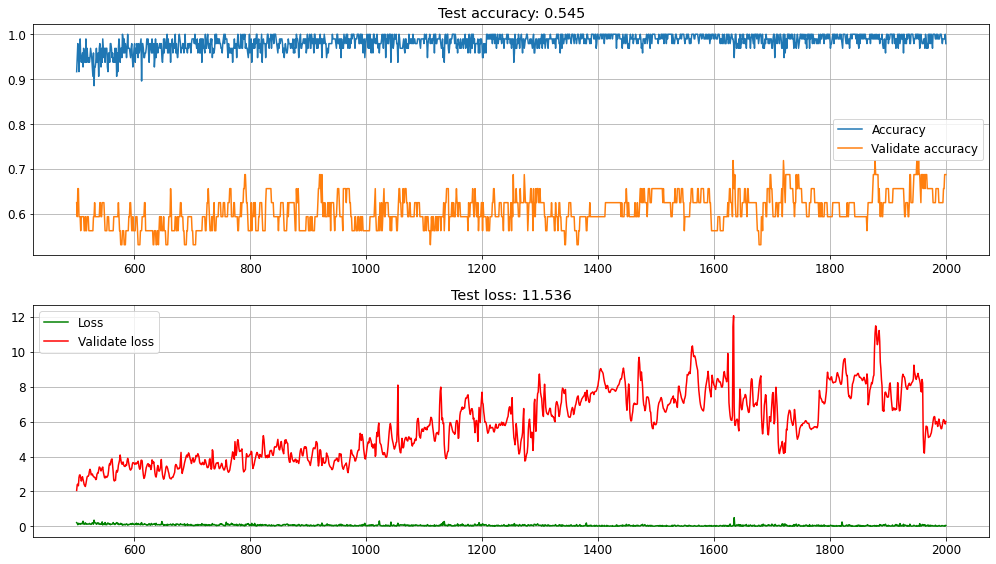

In [ ]:
# visualize prediction performance

DISPLAY_SKIP = 500

import matplotlib.pyplot as plt


accuracy = history.history['accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']
epochs = np.arange(len(accuracy)) + 1

plt.rcParams['font.size'] = 12
plt.figure(figsize=(14, 8))

plt.subplot(211)
plt.title(f'Test accuracy: {round(test_score[1], 3)}')
plt.plot(epochs[DISPLAY_SKIP:], accuracy[DISPLAY_SKIP:], label='Accuracy')
plt.plot(epochs[DISPLAY_SKIP:], val_accuracy[DISPLAY_SKIP:], label='Validate accuracy')
plt.grid(True)
plt.legend()

plt.subplot(212)
plt.title(f'Test loss: {round(test_score[0], 3)}')
plt.plot(epochs[DISPLAY_SKIP:], loss[DISPLAY_SKIP:], label='Loss', color='green')
plt.plot(epochs[DISPLAY_SKIP:], val_loss[DISPLAY_SKIP:], label='Validate loss', color='red')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()